# Loss graphic

In [9]:
import re
import matplotlib.pyplot as plt

def show_loss(text_name):
    with open(text_name, 'r') as file:
        text = file.read()
# 使用正则表达式匹配并提取信息
    matches = re.findall(r'Epoch (\d+).*?Training: loss ([\d.]+).*?Validation: loss ([\d.]+)', text, re.DOTALL)

    # 提取数据
    epochs = [int(match[0]) for match in matches]
    training_losses = [float(match[1]) for match in matches]
    validation_losses = [float(match[2]) for match in matches]

    # 绘制图表
    plt.figure(figsize=(8, 6))
    plt.plot(epochs, training_losses, label='Training Loss', marker='o', markersize=1)
    plt.plot(epochs, validation_losses, label='Validation Loss', marker='o',markersize=1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss')
    plt.legend()
    plt.grid(True)
    plt.show()


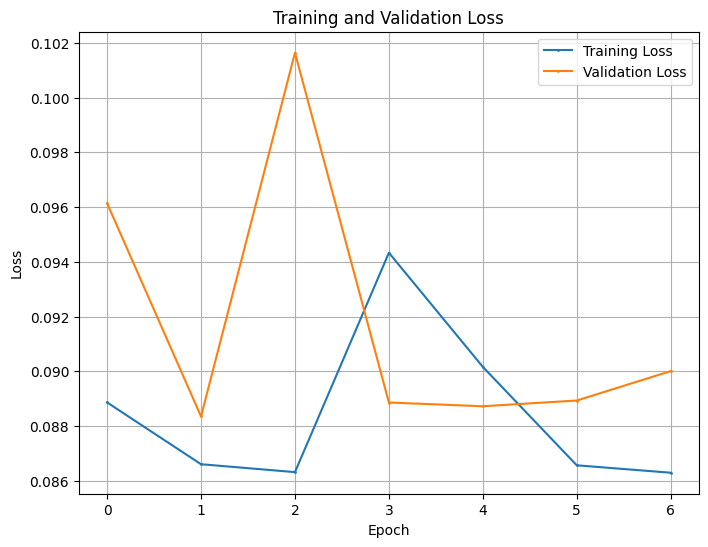

In [12]:
# grouped by shape number
show_loss("23_08_1720737/Loss.txt")

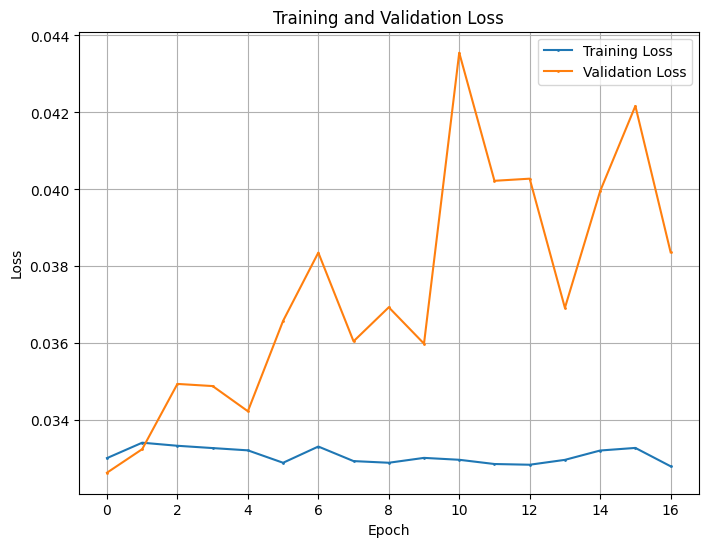

In [16]:
#grouped by shape number without VN Layer
show_loss("24_08_220709/Loss.txt")

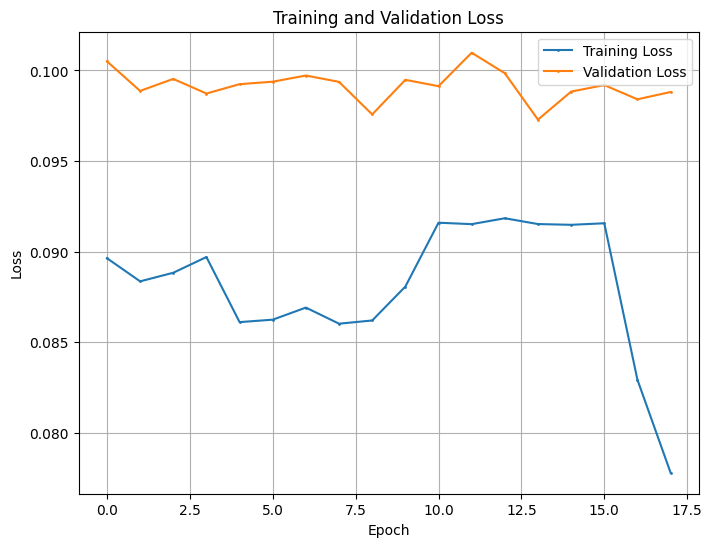

In [14]:
#split to 2 group
show_loss("25_08_201759/Loss.txt")

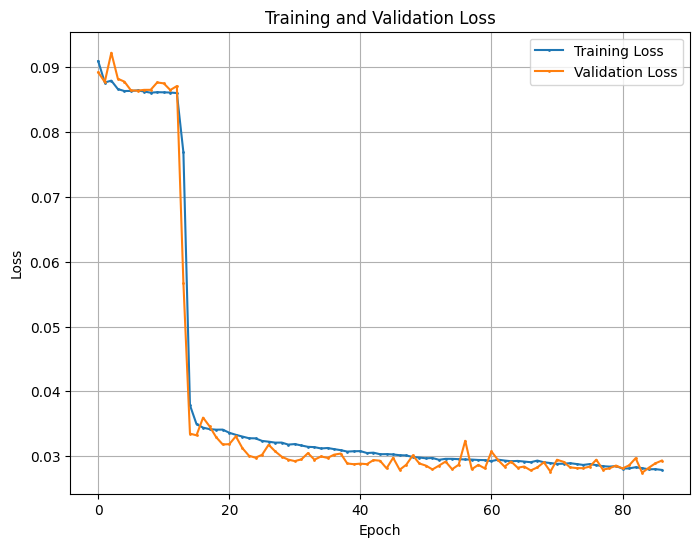

In [15]:
# as a whole
show_loss("27_08_102716/Loss.txt")

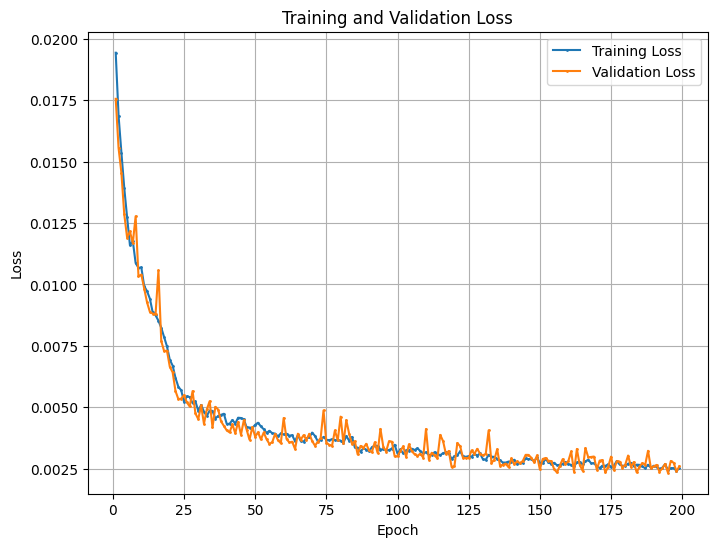

In [10]:
#without VN layers
show_loss("30_08_160819/Loss.txt")

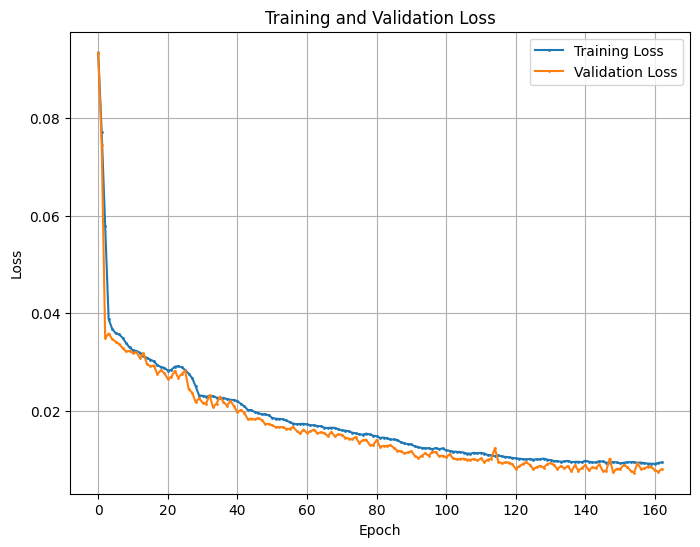

In [11]:
#with VN layers
show_loss("29_08_224247/Loss.txt")

# Invariance Evaluation

In [6]:
import numpy as np
import point_cloud_utils as pcu


def main_direction(data):


    data = np.array(data)  

    # Calculate the mean and center the data
    mean = np.mean(data, axis=0)
    centered_data = data - mean

    # Calculate the covariance matrix
    cov_matrix = np.cov(centered_data, rowvar=False)

    # Compute eigenvectors and eigenvalues
    eigenvalues, eigenvectors = np.linalg.eigh(cov_matrix)

    # Extraction of the main directions
    main_direction = eigenvectors[:, -1]

    return(main_direction)

def sin_AB(A,B):
    # Calculate the cross product
    cross_product = np.cross(A, B)

    # Calculate the modulus (length) of a vector
    norm_A = np.linalg.norm(A)
    norm_B = np.linalg.norm(B)

    # Calculate the sin of the angle
    sin_value = np.linalg.norm(cross_product) / (norm_A * norm_B)
    sin_value="{:.4f}".format(sin_value)
    print("the sin of the angle: ", sin_value)

def translation_value(vertices1, vertices2):
    # Calculate the center
    center1=np.mean(vertices1)
    center2=np.mean(vertices2)
    # Calculate translation value and normalize
    value=abs(np.linalg.norm(center1-center2)/np.linalg.norm(np.array([1,1,1]-np.array([-1,-1,-1]))))
    value="{:.4f}".format(value)
    print("value of translation:", value)

d:\minconda\envs\deepsdf\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
d:\minconda\envs\deepsdf\lib\site-packages\numpy\.libs\libopenblas64__v0.3.21-gcc_10_3_0.dll
d:\minconda\envs\deepsdf\lib\site-packages\numpy\.libs\libopenblas64__v0.3.23-gcc_10_3_0.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [1]:
v1, _ = pcu.load_mesh_vf("17_08_011740/meshes_training/mesh_0.obj")
v2, _ = pcu.load_mesh_vf("22_08_202540/meshes_training/mesh_0.obj")
print("for classic DeepSDF")
translation_value(v1,v2)
sin_AB(main_direction(v1),main_direction(v2))

for classic DeepSDF
value of translation: 0.4226
the sin of the angle: 0.2877


In [5]:
v1, _ = pcu.load_mesh_vf("29_08_224247/meshes_training/mesh_0.obj")
v2, _ = pcu.load_mesh_vf("30_08_172519/meshes_training/mesh_0.obj")
print("for VN DeepSDF")
translation_value(v1,v2)
sin_AB(main_direction(v1),main_direction(v2))

for VN DeepSDF
value of translation: 0.0871
the sin of the angle: 0.0175
